In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

c:\Users\ACER\ANA\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Show all columns upon viewing dataframe
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("datasets/enrollment_data.csv")

In [4]:
print(df.head())

         date student_id   course_category        team sales_rep  \
0  2024-07-31   STU_0001  Business English  Team Delta    Rep_12   
1  2024-07-15   STU_0002  Business English  Team Sigma    Rep_10   
2  2024-03-18   STU_0003      Kids English  Team Delta    Rep_10   
3  2024-02-28   STU_0004  Business English  Team Sigma    Rep_14   
4  2024-03-05   STU_0005             TOEIC  Team Alpha     Rep_2   

   contract_value contract_status  
0         1326000          Active  
1         1659000          Active  
2         1060000          Active  
3         1494000          Active  
4         1330000          Active  


In [7]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             2000 non-null   object
 1   student_id       2000 non-null   object
 2   course_category  2000 non-null   object
 3   team             2000 non-null   object
 4   sales_rep        2000 non-null   object
 5   contract_value   2000 non-null   int64 
 6   contract_status  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [6]:
df.describe()

,contract_value
count,2000.000
mean,1109945.500
std,512268.248
min,200000.000
25%,688000.000
50%,1127500.000
75%,1541250.000
max,1999000.000


In [8]:
df.isnull().sum()

date               0
student_id         0
course_category    0
team               0
sales_rep          0
contract_value     0
contract_status    0
dtype: int64

In [11]:
#Convert date column to datetime data type
df["date"] = pd.to_datetime(df["date"])

In [13]:
#Create month and year columns
df["year_month"] = df["date"].dt.to_period("M").astype(str)

In [14]:
#Filter active contracts only
df_active = df[df["contract_status"] == "Active"]

c:\Users\ACER\ANA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ACER\ANA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


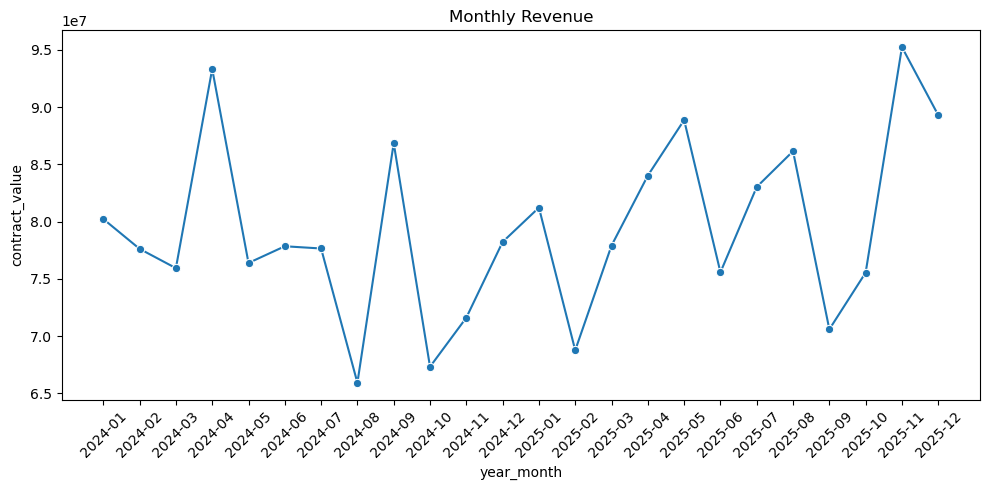

In [18]:
#Monthly revenue

#Create dataframe
monthly_revenue = (
    df_active.groupby("year_month")["contract_value"]
    .sum()
    .reset_index()
)

#Plot
plt.figure(figsize=(10,5))
sns.lineplot(
    data=monthly_revenue,
    x="year_month",
    y="contract_value",
    marker="o"
    )
plt.title("Monthly Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()